<a href="https://colab.research.google.com/github/Swington/data_upskill/blob/master/waterpump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Waterpump challenge](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/)


# Imports

In [0]:
# importing necesary libraries

 

%matplotlib inline

import pandas as pd

import numpy as np

import glob

import os

import datetime

import statsmodels

from matplotlib import pyplot as plt

import seaborn as sns

import sys

import plotly.express as px

import warnings

import plotly

from plotly.subplots import make_subplots

import plotly.graph_objects as go

warnings.filterwarnings("ignore")

plotly.offline.init_notebook_mode(connected=True)

 

from IPython.display import display

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

 

import sys

print(sys.version)

print(sys.path)

# custom
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

# Download data

In [2]:
!wget https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv

--2020-02-05 16:41:50--  https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.25.126
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.25.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20069199 (19M) [text/csv]
Saving to: ‘4910797b-ee55-40a7-8668-10efd5c1b960.csv’

4910797b-ee55-40a7- 100%[===================>]  19.14M  22.3MB/s    in 0.9s    

2020-02-05 16:41:51 (22.3 MB/s) - ‘4910797b-ee55-40a7-8668-10efd5c1b960.csv’ saved [20069199/20069199]



In [3]:
!wget https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv

--2020-02-05 16:41:52--  https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.25.126
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.25.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148327 (1.1M) [text/csv]
Saving to: ‘0bf8bc6e-30d0-4c50-956a-603fc693d966.csv’

0bf8bc6e-30d0-4c50- 100%[===================>]   1.09M  3.37MB/s    in 0.3s    

2020-02-05 16:41:52 (3.37 MB/s) - ‘0bf8bc6e-30d0-4c50-956a-603fc693d966.csv’ saved [1148327/1148327]



In [4]:
!wget https://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv

--2020-02-05 16:41:53--  https://s3.amazonaws.com/drivendata/data/7/public/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.230.141
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.230.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5016337 (4.8M) [text/csv]
Saving to: ‘702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv’

702ddfc5-68cd-4d1d- 100%[===================>]   4.78M  8.97MB/s    in 0.5s    

2020-02-05 16:41:54 (8.97 MB/s) - ‘702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv’ saved [5016337/5016337]



# Load data

In [0]:
data = pd.read_csv("4910797b-ee55-40a7-8668-10efd5c1b960.csv")
data = data.set_index('id')
# data = data.drop(columns=['id'])

data['date_recorded'] = pd.to_datetime(data['date_recorded'])
data.head()

In [0]:
labels = pd.read_csv("0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")
labels = labels.set_index('id')
# labels = labels.drop(columns=['id'])
labels.head()
sns.countplot(x='status_group', data=labels)

In [0]:
merged_data = data.merge(labels, on='id')
merged_data.head()

In [0]:
test_data = pd.read_csv("702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv")
# test_data = test_data.set_index('id')
test_data = test_data.drop(columns=['id'])
test_data['date_recorded'] =  pd.to_datetime(test_data['date_recorded'])
test_data.head()

# Exploratory data analysis


## Correlation


In [11]:
corr = merged_data.corr()
corr.columns
corr.style.background_gradient(cmap='coolwarm')

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year'],
      dtype='object')

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
amount_tsh,1,0.0766503,0.0221342,-0.0526702,0.00294373,-0.026813,-0.0235994,0.0162876,0.0679152
gps_height,0.0766503,1,0.149155,-0.0357514,0.00723688,-0.183521,-0.171233,0.135003,0.658727
longitude,0.0221342,0.149155,1,-0.425802,0.0238733,0.034197,0.151398,0.0865897,0.396732
latitude,-0.0526702,-0.0357514,-0.425802,1,0.00683683,-0.221018,-0.20102,-0.0221519,-0.245278
num_private,0.00294373,0.00723688,0.0238733,0.00683683,1,-0.0203768,-0.00447751,0.00381836,0.0260556
region_code,-0.026813,-0.183521,0.034197,-0.221018,-0.0203768,1,0.678602,0.0940884,0.0317241
district_code,-0.0235994,-0.171233,0.151398,-0.20102,-0.00447751,0.678602,1,0.0618314,0.0483152
population,0.0162876,0.135003,0.0865897,-0.0221519,0.00381836,0.0940884,0.0618314,1,0.26091
construction_year,0.0679152,0.658727,0.396732,-0.245278,0.0260556,0.0317241,0.0483152,0.26091,1


,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group
id,,,,,,,,,,,
69572,6000.0,2011-03-14,1390,34.938093,-9.856322,0,11,5,109,1999,functional
8776,0.0,2013-03-06,1399,34.698766,-2.147466,0,20,2,280,2010,functional
34310,25.0,2013-02-25,686,37.460664,-3.821329,0,21,4,250,2009,functional
67743,0.0,2013-01-28,263,38.486161,-11.155298,0,90,63,58,1986,non functional
19728,0.0,2011-07-13,0,31.130847,-1.825359,0,18,1,0,0,functional


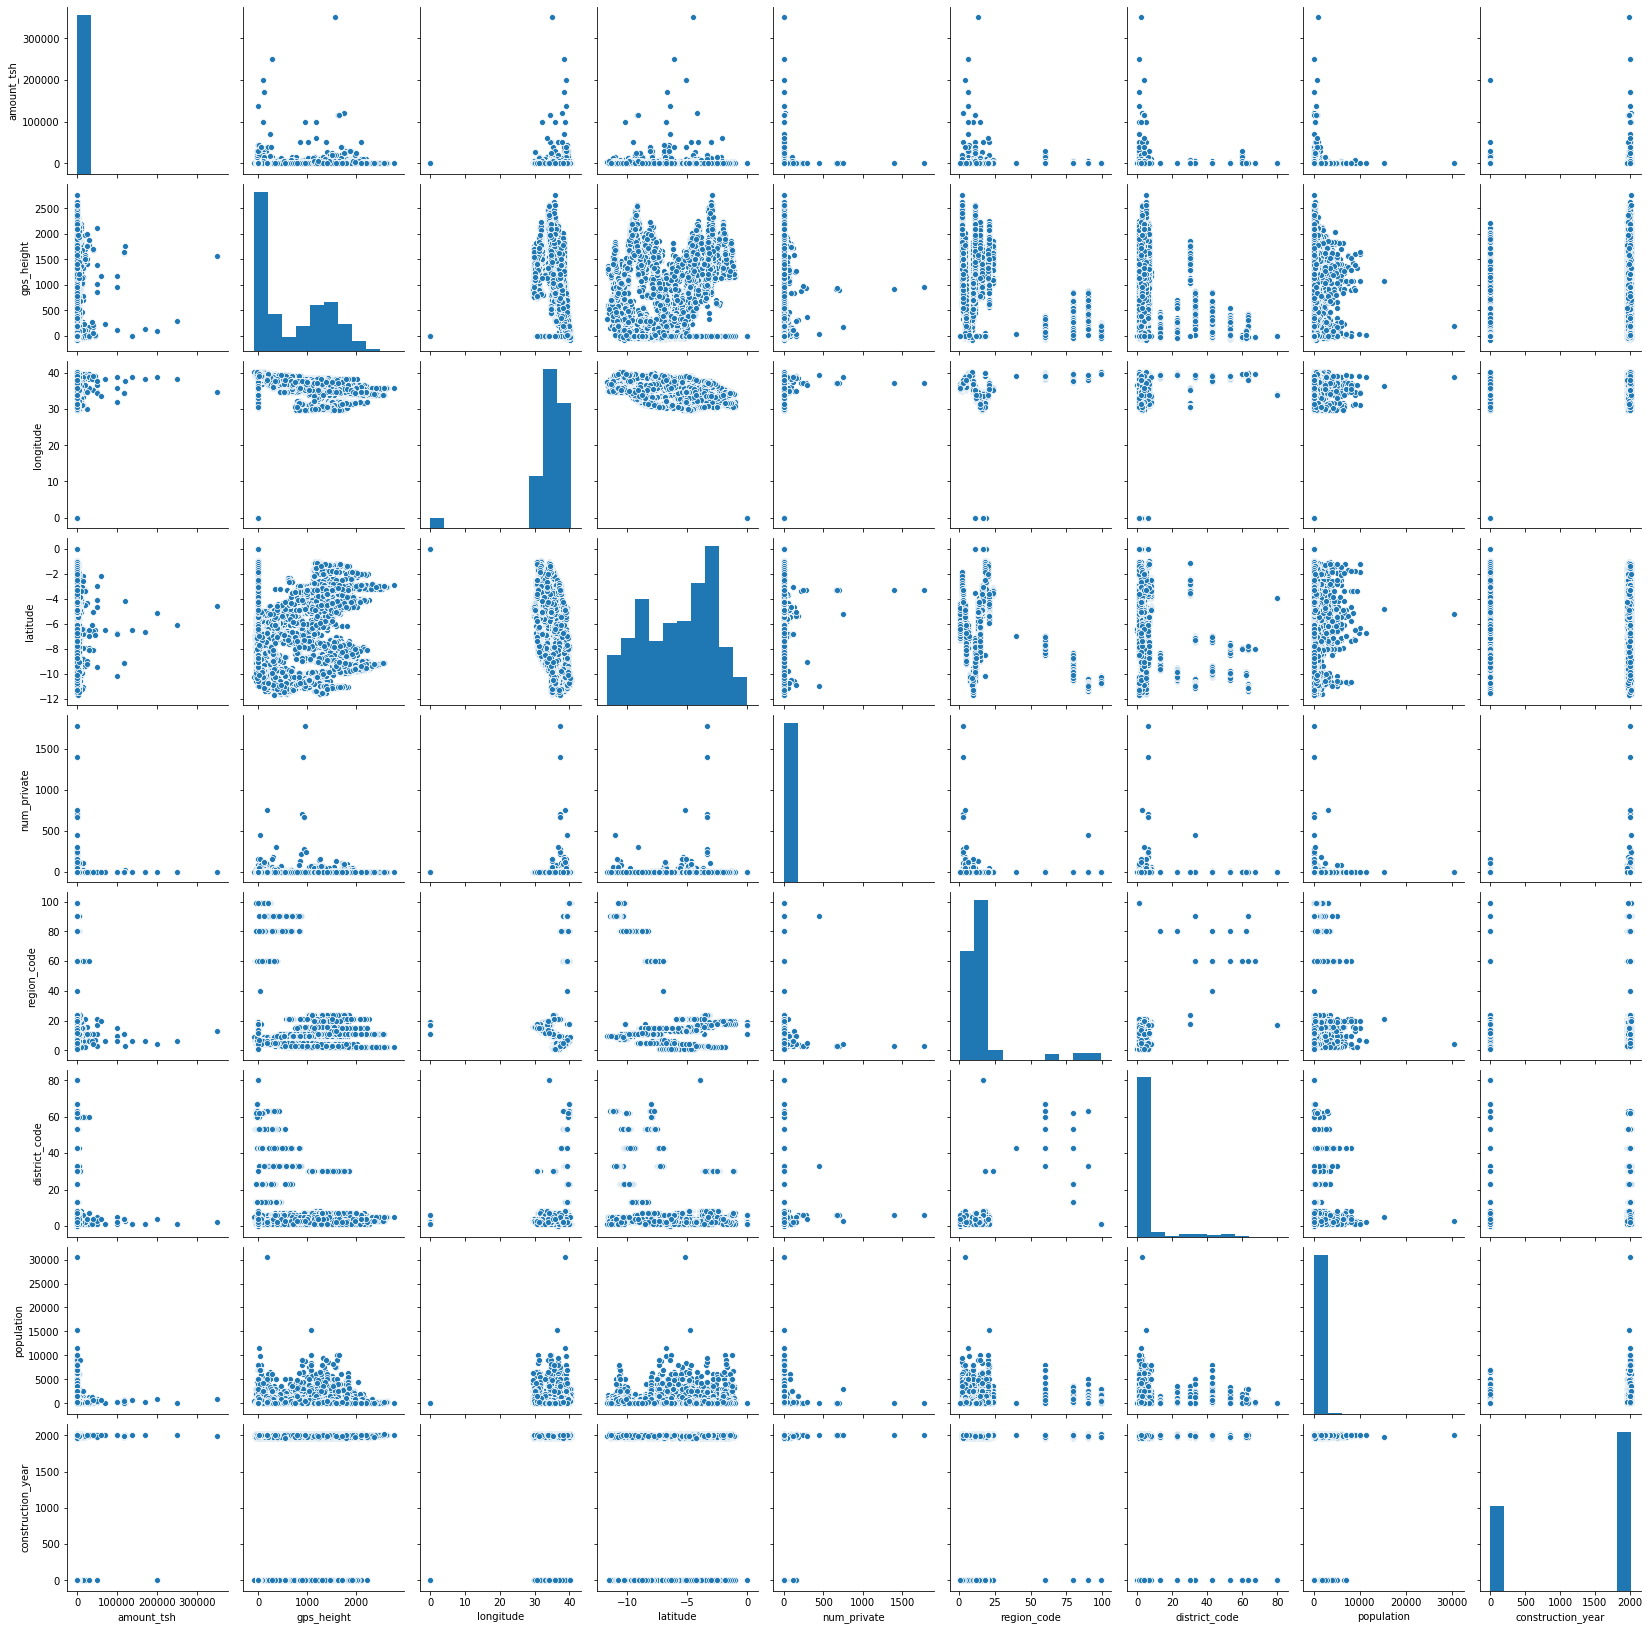

In [13]:
non_object_data = merged_data.select_dtypes(exclude=['object'])
non_object_data = non_object_data.merge(labels, on='id')
non_object_data.head()
sns.pairplot(non_object_data)

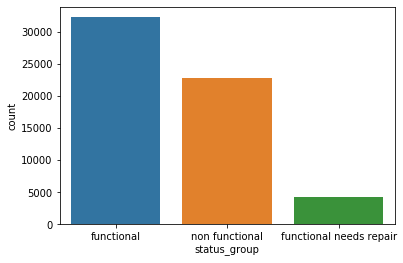

In [14]:
sns.countplot(x="status_group", data=merged_data)

In [15]:
col_names = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year', 'status_group']
filtered_data = merged_data[col_names]
filtered_data.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group
id,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,functional
8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,functional
34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,functional
67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,non functional
19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,functional


In [19]:
len(filtered_data)
filtered_data = filtered_data.drop(filtered_data[filtered_data.construction_year == 0].index)
len(filtered_data)
filtered_data.head()

38691

38691

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group
id,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,functional
8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,functional
34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,functional
67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,non functional
9944,20.0,0,39.172796,-4.765587,0,4,8,1,2009,functional


# Oversampling

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group
id,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,functional
8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,functional
34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,functional
67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,non functional
9944,20.0,0,39.172796,-4.765587,0,4,8,1,2009,functional


0    2
1    2
2    2
3    0
4    2
Name: status_group, dtype: int64

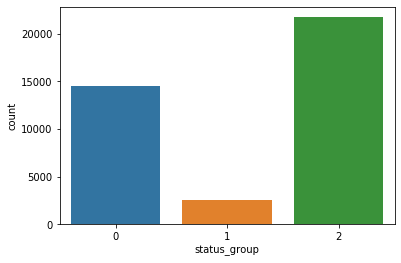

In [30]:
filtered_labels = filtered_data[['status_group']]
filtered_data.head()

target = filtered_labels.reset_index()
target = target['status_group'].map({'functional': 2, 'functional needs repair': 1, 'non functional': 0}).astype(int)
target.head()
sns.countplot(target)

In [34]:
from imblearn.over_sampling import SMOTE

over_sampling = SMOTE(random_state=42, k_neighbors=5)

features = filtered_data.drop(columns=['status_group'])
features = features.reset_index(drop=True)
features.head()
len(features)

target.head()
len(target)

features_oversampled, target_oversampled = over_sampling.fit_resample(features, target)

features_oversampled = pd.DataFrame(features_oversampled, columns=[features.columns])

sns.countplot(target_oversampled)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,20.0,0,39.172796,-4.765587,0,4,8,1,2009


38691

0    2
1    2
2    2
3    0
4    2
Name: status_group, dtype: int64

38691

ValueError: ignored

In [39]:
output_data = np.column_stack((features_oversampled, target_oversampled))
output = pd.DataFrame(output_data, columns=[filtered_data.columns])
output.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group
0,6000.0,1390.0,34.938093,-9.856322,0.0,11.0,5.0,109.0,1999.0,2.0
1,0.0,1399.0,34.698766,-2.147466,0.0,20.0,2.0,280.0,2010.0,2.0
2,25.0,686.0,37.460664,-3.821329,0.0,21.0,4.0,250.0,2009.0,2.0
3,0.0,263.0,38.486161,-11.155298,0.0,90.0,63.0,58.0,1986.0,0.0
4,20.0,0.0,39.172796,-4.765587,0.0,4.0,8.0,1.0,2009.0,2.0


# Auto ML with H2O


In [22]:
! pip install h2o

     |████████████████████████████████| 126.2MB 77kB/s 
  Created wheel for h2o: filename=h2o-3.28.0.2-py2.py3-none-any.whl size=126306425 sha256=1bfd172b9f55082fa7b885028c5bafa3ef10f0a8ded2a639b40cd18395b58043
  Stored in directory: /root/.cache/pip/wheels/aa/ef/05/cc37b576425ec5a47be07cc42aa60c6e8b3fc21119808a6b63
Successfully built h2o


In [40]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpb0p_tb18
  JVM stdout: /tmp/tmpb0p_tb18/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpb0p_tb18/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.2
H2O cluster version age:,15 days
H2O cluster name:,H2O_from_python_unknownUser_8duqz6
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
h2o_data = h2o.H2OFrame(output_data)
h2o_data[-1] = h2o_data[-1].asfactor()
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(y = -1, training_frame = h2o_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |██

In [1]:
aml.leaderboard

# explain evaluation methods: confusion matrix (accuracy, precision, recall, F1), logloss, auc, etc.
# how to use metric to solve unbalanced class problem
# waterpump models, evaluations
# how transforming data changes output model
# data scaling
# PCA : https://github.com/MaxHalford/prince

NameError: ignored